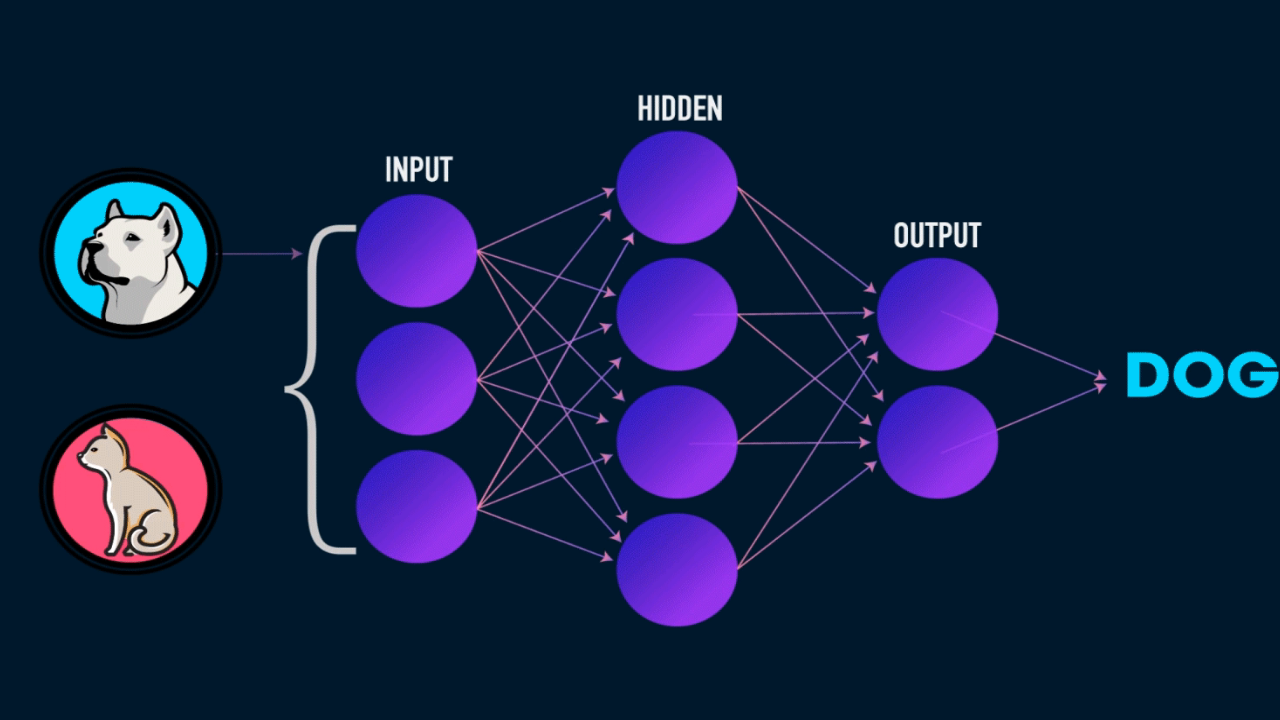

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2024-03-17 15:37:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   185MB/s    in 0.4s    

2024-03-17 15:37:54 (185 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#repertoires avec nos photos(d'entrainement) de chiens et de chats
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#repertoires avec nos photos(de validation) de chiens et de chats
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:11])
print(train_dog_fnames[:12])

['cat.874.jpg', 'cat.610.jpg', 'cat.840.jpg', 'cat.246.jpg', 'cat.890.jpg', 'cat.125.jpg', 'cat.708.jpg', 'cat.471.jpg', 'cat.865.jpg', 'cat.561.jpg', 'cat.228.jpg']
['dog.38.jpg', 'dog.735.jpg', 'dog.754.jpg', 'dog.355.jpg', 'dog.981.jpg', 'dog.906.jpg', 'dog.170.jpg', 'dog.421.jpg', 'dog.985.jpg', 'dog.564.jpg', 'dog.922.jpg', 'dog.413.jpg']


In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


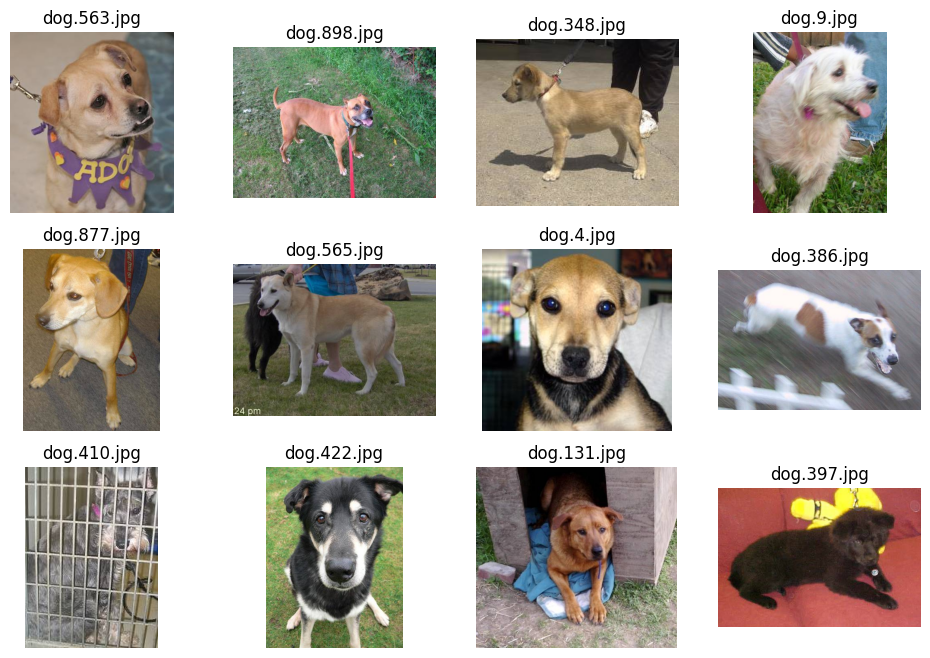

In [7]:
samples_dogs = np.random.choice(os.listdir(train_dogs_dir),size = 12)

plt.figure(figsize = (12,8))
for i,dog in enumerate(samples_dogs):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_dogs_dir,dog))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(dog)

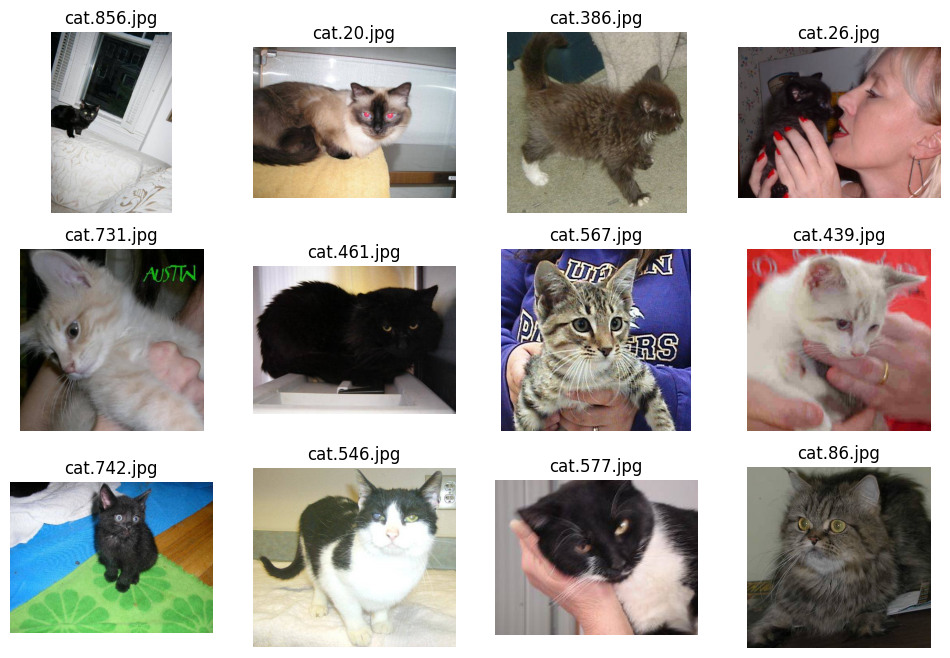

In [8]:
samples_cats = np.random.choice(os.listdir(train_cats_dir),size = 12)
plt.figure(figsize = (12,8))
for i,cat in enumerate(samples_cats):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_cats_dir,cat))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(cat)

(460, 499, 3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['acc'])

In [13]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Epoch 1/10
100/100 [==============================] - 11s 50ms/step - loss: 0.7203 - acc: 0.5140 - val_loss: 0.6918 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 6s 59ms/step - loss: 0.6974 - acc: 0.5195 - val_loss: 0.6886 - val_acc: 0.5450
Epoch 3/10
100/100 [==============================] - 6s 59ms/step - loss: 0.6845 - acc: 0.5825 - val_loss: 0.6760 - val_acc: 0.5570
Epoch 4/10
100/100 [==============================] - 5s 54ms/step - loss: 0.6525 - acc: 0.6200 - val_loss: 0.6247 - val_acc: 0.6550
Epoch 5/10
100/100 [==============================] - 6s 58ms/step - loss: 0.6128 - acc: 0.6690 - val_loss: 0.5969 - val_acc: 0.6810
Epoch 6/10
100/100 [==============================] - 6s 58ms/step - loss: 0.5830 - acc: 0.6985 - val_loss: 0.6040 - val_acc: 0.6940
Epoch 7/10
100/100 [==============================] - 6s 56ms/step - loss: 0.5387 - acc: 0.7350 - val_loss: 0.5720 - val_acc: 0.6960
Epoch 8/10
100/100 [==============================] - 5s 48ms/step -

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

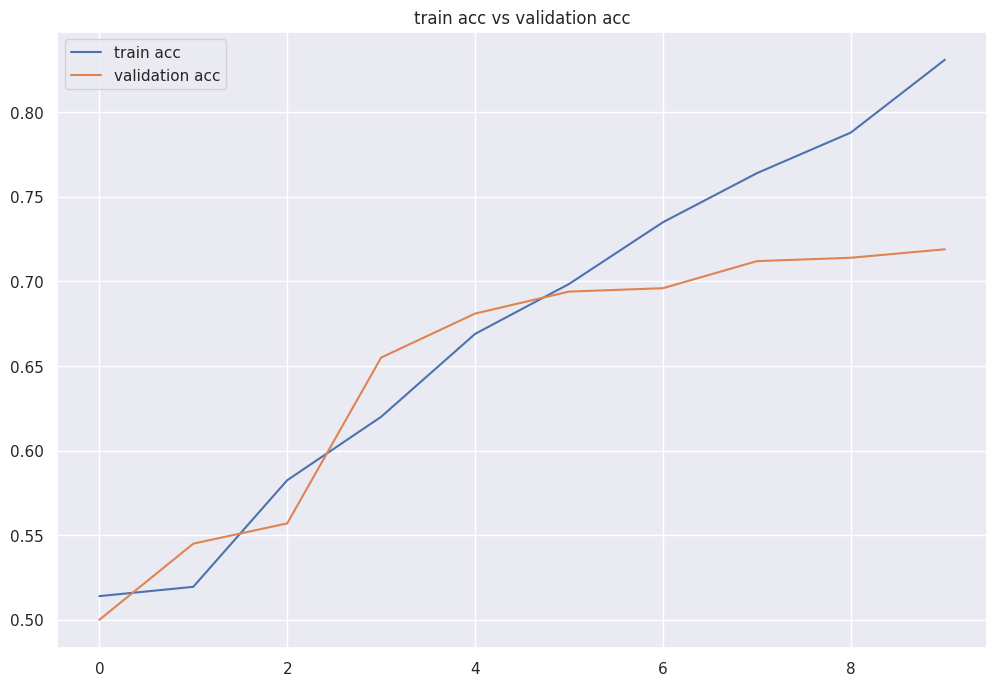

In [16]:
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

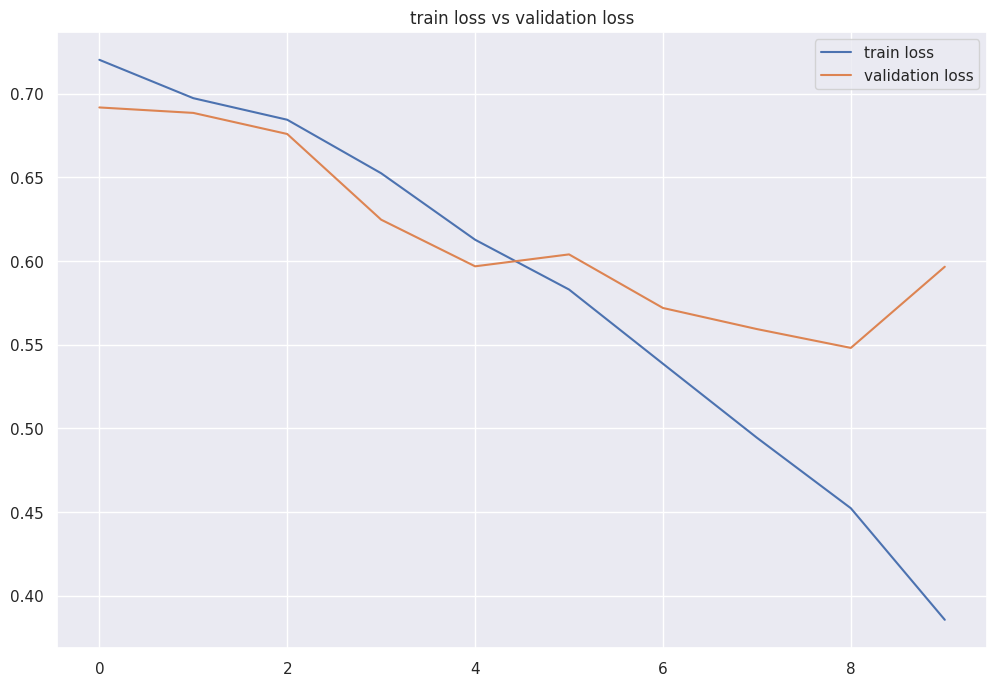

In [17]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# image augmentation

In [18]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [19]:
from tensorflow.keras.preprocessing import image

sample_cat = np.random.choice(os.listdir(train_cats_dir))
img = image.load_img(os.path.join(train_cats_dir,sample_cat),target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

datagen_img = datagen.flow(x,batch_size = 1)

In [20]:
x.shape

(1, 150, 150, 3)

(-0.5, 149.5, 149.5, -0.5)

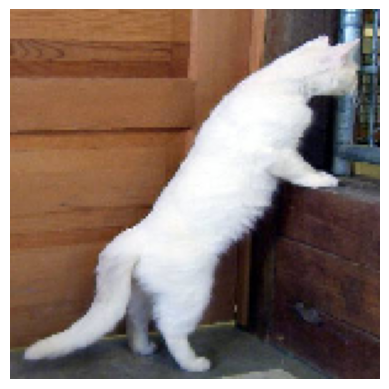

In [21]:
plt.imshow(img)
plt.axis("off")

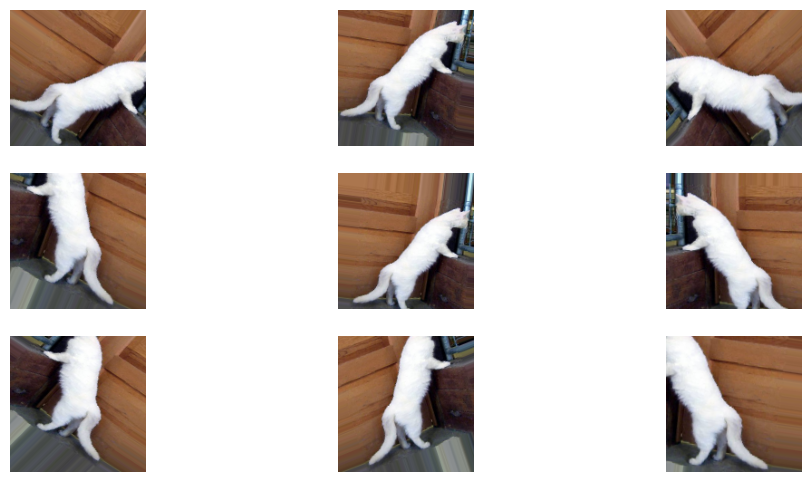

In [22]:
plt.figure(figsize = (12,6))
for i,batch in enumerate(datagen.flow(x,batch_size = 1)):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.squeeze(batch).astype("int64"))
    plt.axis("off")

    if i == 8:
        break
plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range=40, #va faire une rotation de l'image en choissisant un nb aleatoire entre 0 et 40
    width_shift_range=0.2, #va deplacer l'objet de 20% de sa largeur(il peut etre negatif)
    height_shift_range=0.2,
    shear_range=0.2,#va cisailler l'image de 20%
    zoom_range=0.2, # pour zoomer dans l'image de 0 a 0.2
    horizontal_flip=True, #va faire une symetrie de l'image suivant la droite qui passe par le centre de l'image
    fill_mode='nearest' #pour specifier comment arranger l'image vu qu'elle va perdre les px apeès nos operations
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics = ['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50


<ipython-input-23-b5d5d674ed19>:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 18s 152ms/step - loss: 0.6941 - acc: 0.5055 - val_loss: 0.6875 - val_acc: 0.5940
Epoch 2/50
100/100 [==============================] - 15s 150ms/step - loss: 0.6870 - acc: 0.5405 - val_loss: 0.6771 - val_acc: 0.5290
Epoch 3/50
100/100 [==============================] - 15s 150ms/step - loss: 0.6816 - acc: 0.5610 - val_loss: 0.6645 - val_acc: 0.5630
Epoch 4/50
100/100 [==============================] - 15s 150ms/step - loss: 0.6727 - acc: 0.5795 - val_loss: 0.6818 - val_acc: 0.5280
Epoch 5/50
100/100 [==============================] - 15s 152ms/step - loss: 0.6634 - acc: 0.6050 - val_loss: 0.6436 - val_acc: 0.6160
Epoch 6/50
100/100 [==============================] - 15s 150ms/step - loss: 0.6489 - acc: 0.6235 - val_loss: 0.6125 - val_acc: 0.6720
Epoch 7/50
100/100 [==============================] - 15s 149ms/step - loss: 0.6368 - acc: 0.6265 - val_loss: 0.5958 - val_acc: 0.6710
Epoch 8/50
100/100 [==============================] - 15s 148ms/st

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

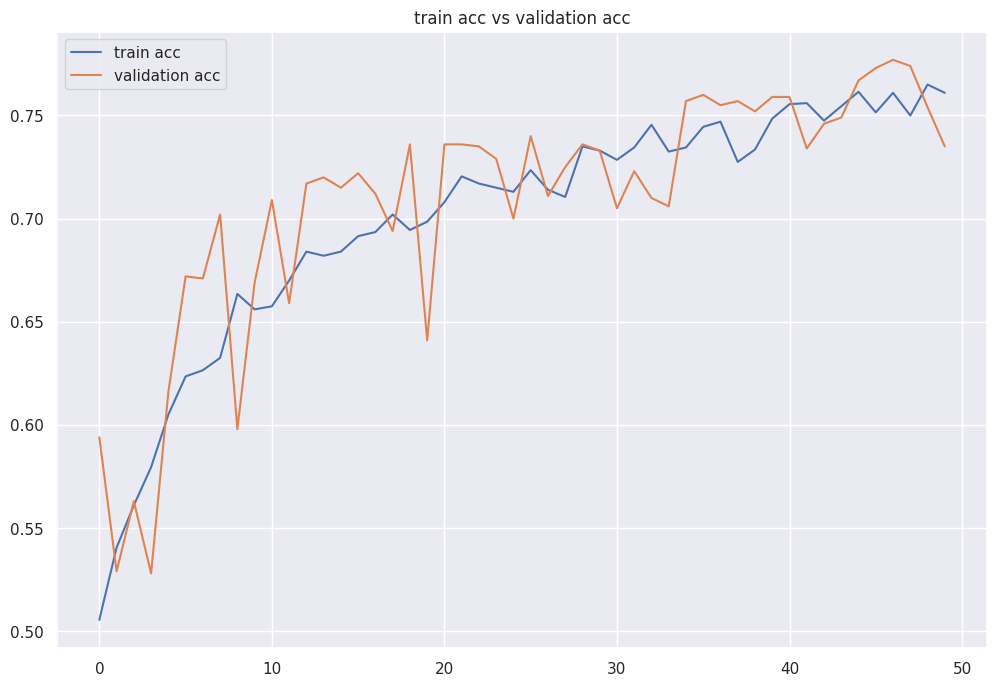

In [25]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

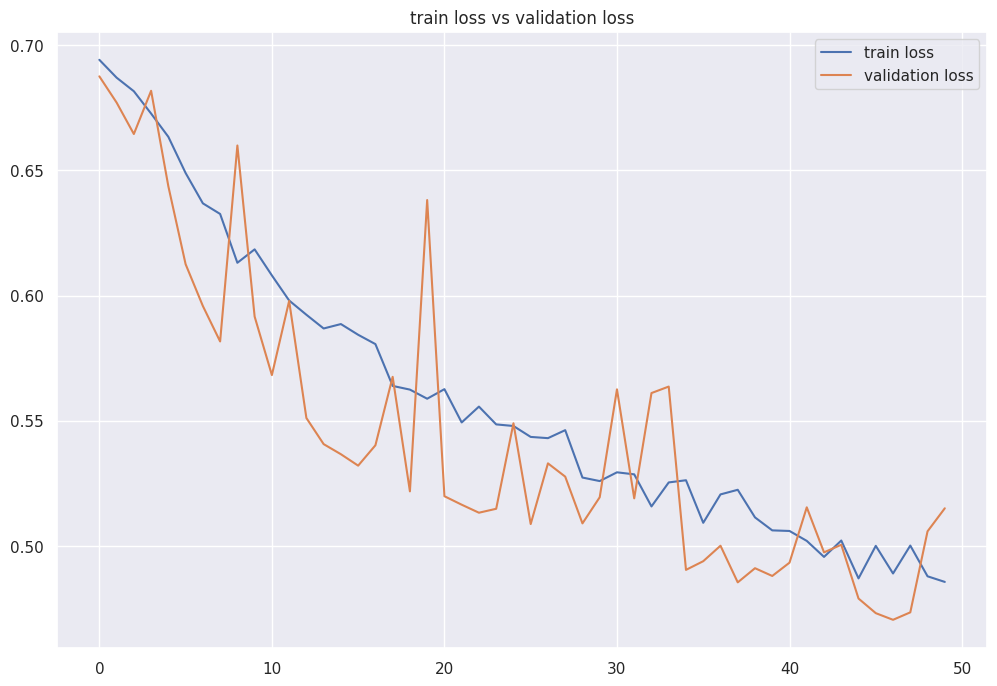

In [26]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# Prediction

In [28]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/tmp/test/chat2.jpg',target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

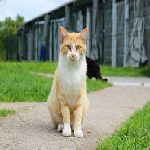

In [29]:
img

In [30]:
x.shape

(1, 150, 150, 3)

In [31]:
model.predict(x)

1/1 [==============================] - 0s 375ms/step


array([[1.]], dtype=float32)

In [33]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}